In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [141]:
image = mpimg.imread('test.jpg')
print('This image is:', type(image), 'with dimensions:', image.shape)

This image is: <class 'numpy.ndarray'> with dimensions: (300, 620, 3)


In [142]:
ysize = image.shape[0]
xsize = image.shape[1]
region_select = np.copy(image)

In [143]:
left_bottom = [100, 300]
right_bottom = [535, 300]
apex = [318, 30]

In [144]:
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

In [145]:
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))

In [146]:
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))

In [147]:
region_select[region_thresholds] = [0, 0, 0]

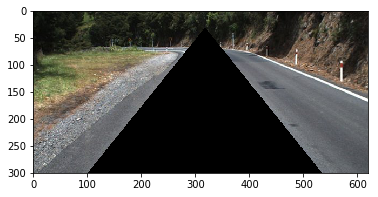

In [148]:
plt.imshow(region_select)